Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

Data

In [2]:
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

Specify target feature and independent features in the data

In [4]:
X = data[['student','balance','income']]
y = data['default']

In [28]:
y.unique()  # Target attribute has binary values only

array([0, 1], dtype=int64)

In [12]:
data.head(3)
print(data.shape)
print('y:',y.shape)
print('x:',X.shape)

(10000, 4)
y: (10000,)
x: (10000, 3)


Split the data

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

Create model and fit the model with data

In [24]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Predict the probabilities of getting a class on the input after converting into 1D array

In [18]:
y_pred_prob = model.predict_proba(X_test)[::,1] # 1D
y_pred_prob

array([1.89326075e-04, 1.42768942e-04, 5.71581735e-03, ...,
       1.53798179e-01, 1.10495803e-03, 6.85351703e-04])

Define the metrics

In [22]:
fpr, tpr,_ = metrics.roc_curve(y_test,  y_pred_prob)

Make The ROC curve

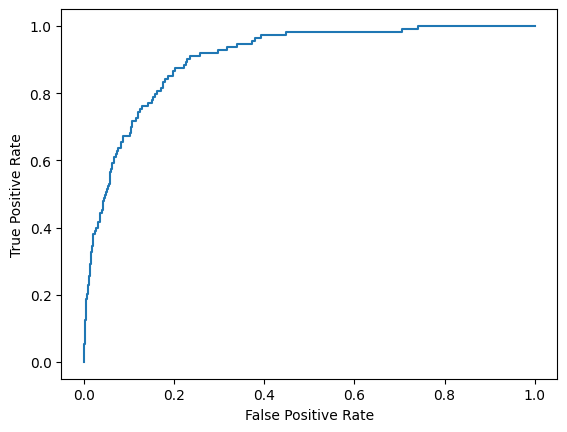

In [23]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC curve

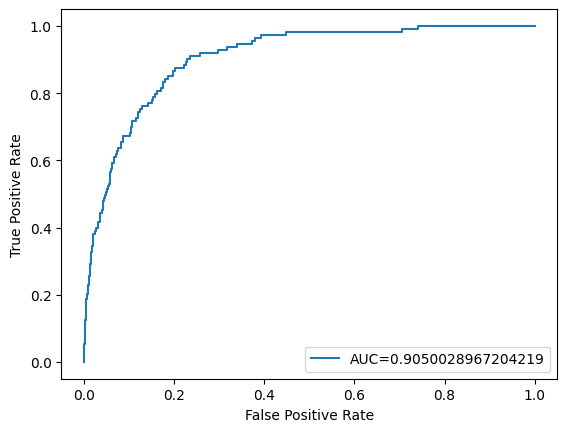

In [26]:
auc = metrics.roc_auc_score(y_test, y_pred_prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()